# <center>Time Series Analysis</center>
# <center>Assignment #1</center>
## <div align=right>Made by Ihor Markevych</div>

### Question 1
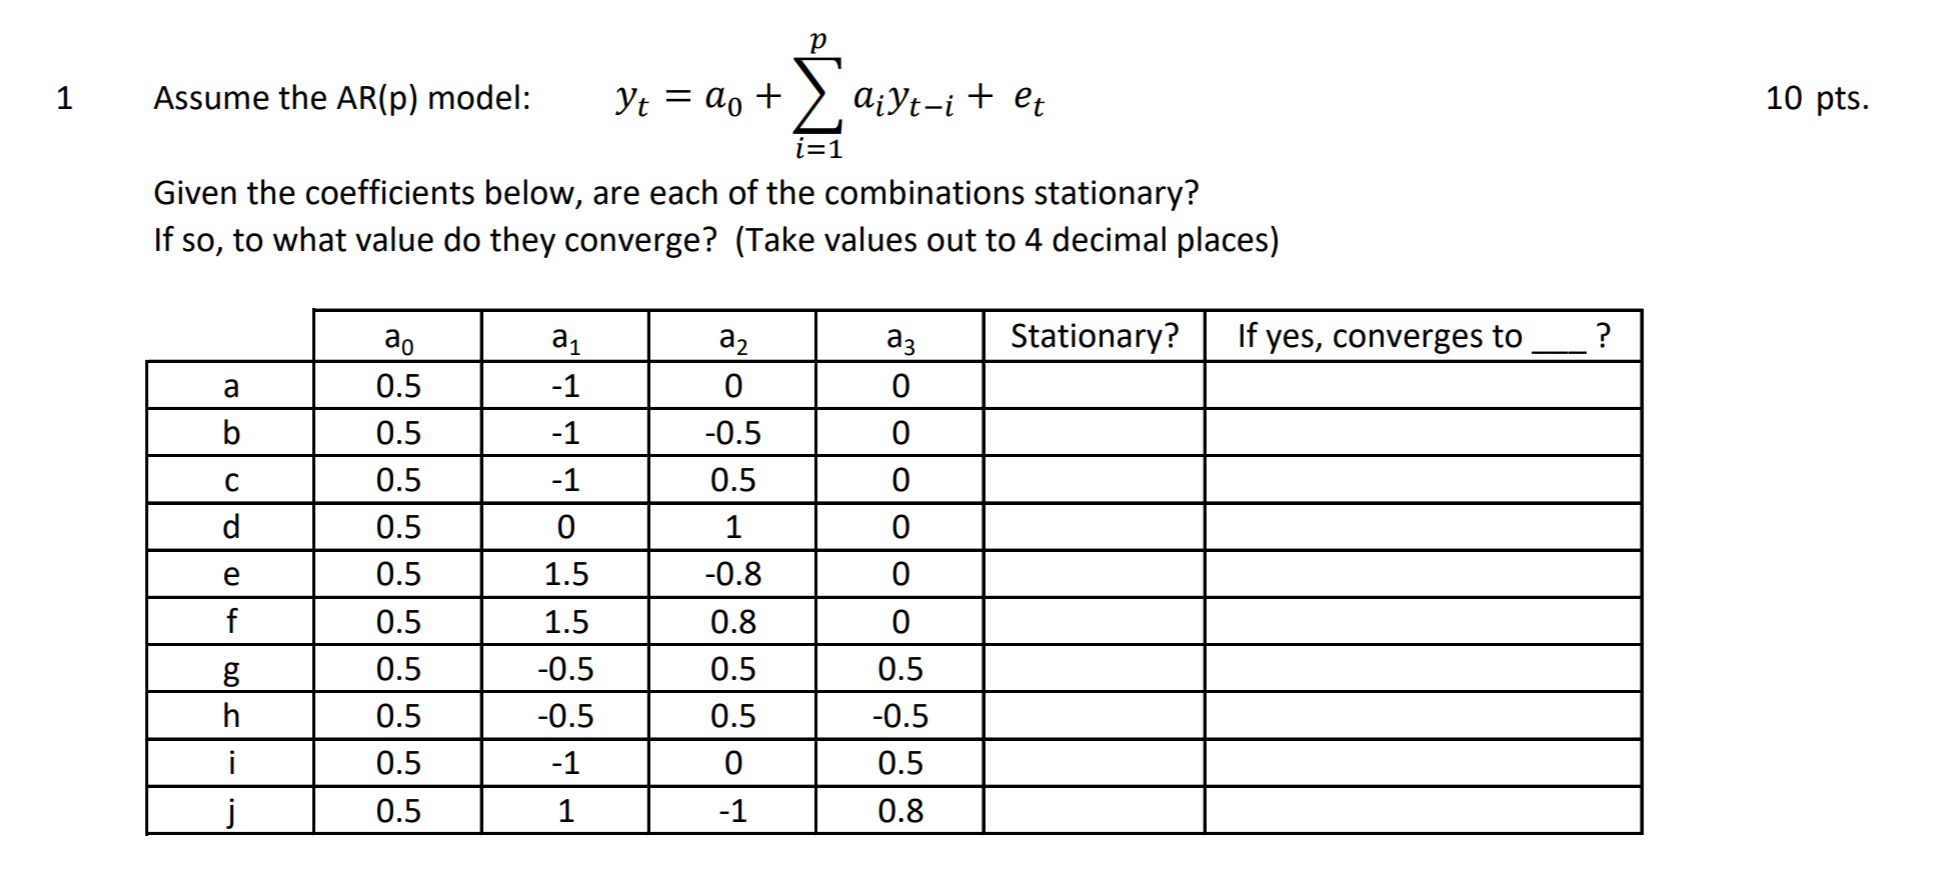

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

#### Stationarity

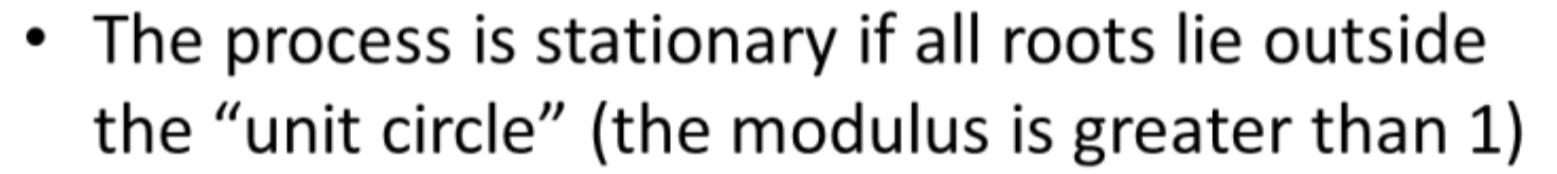

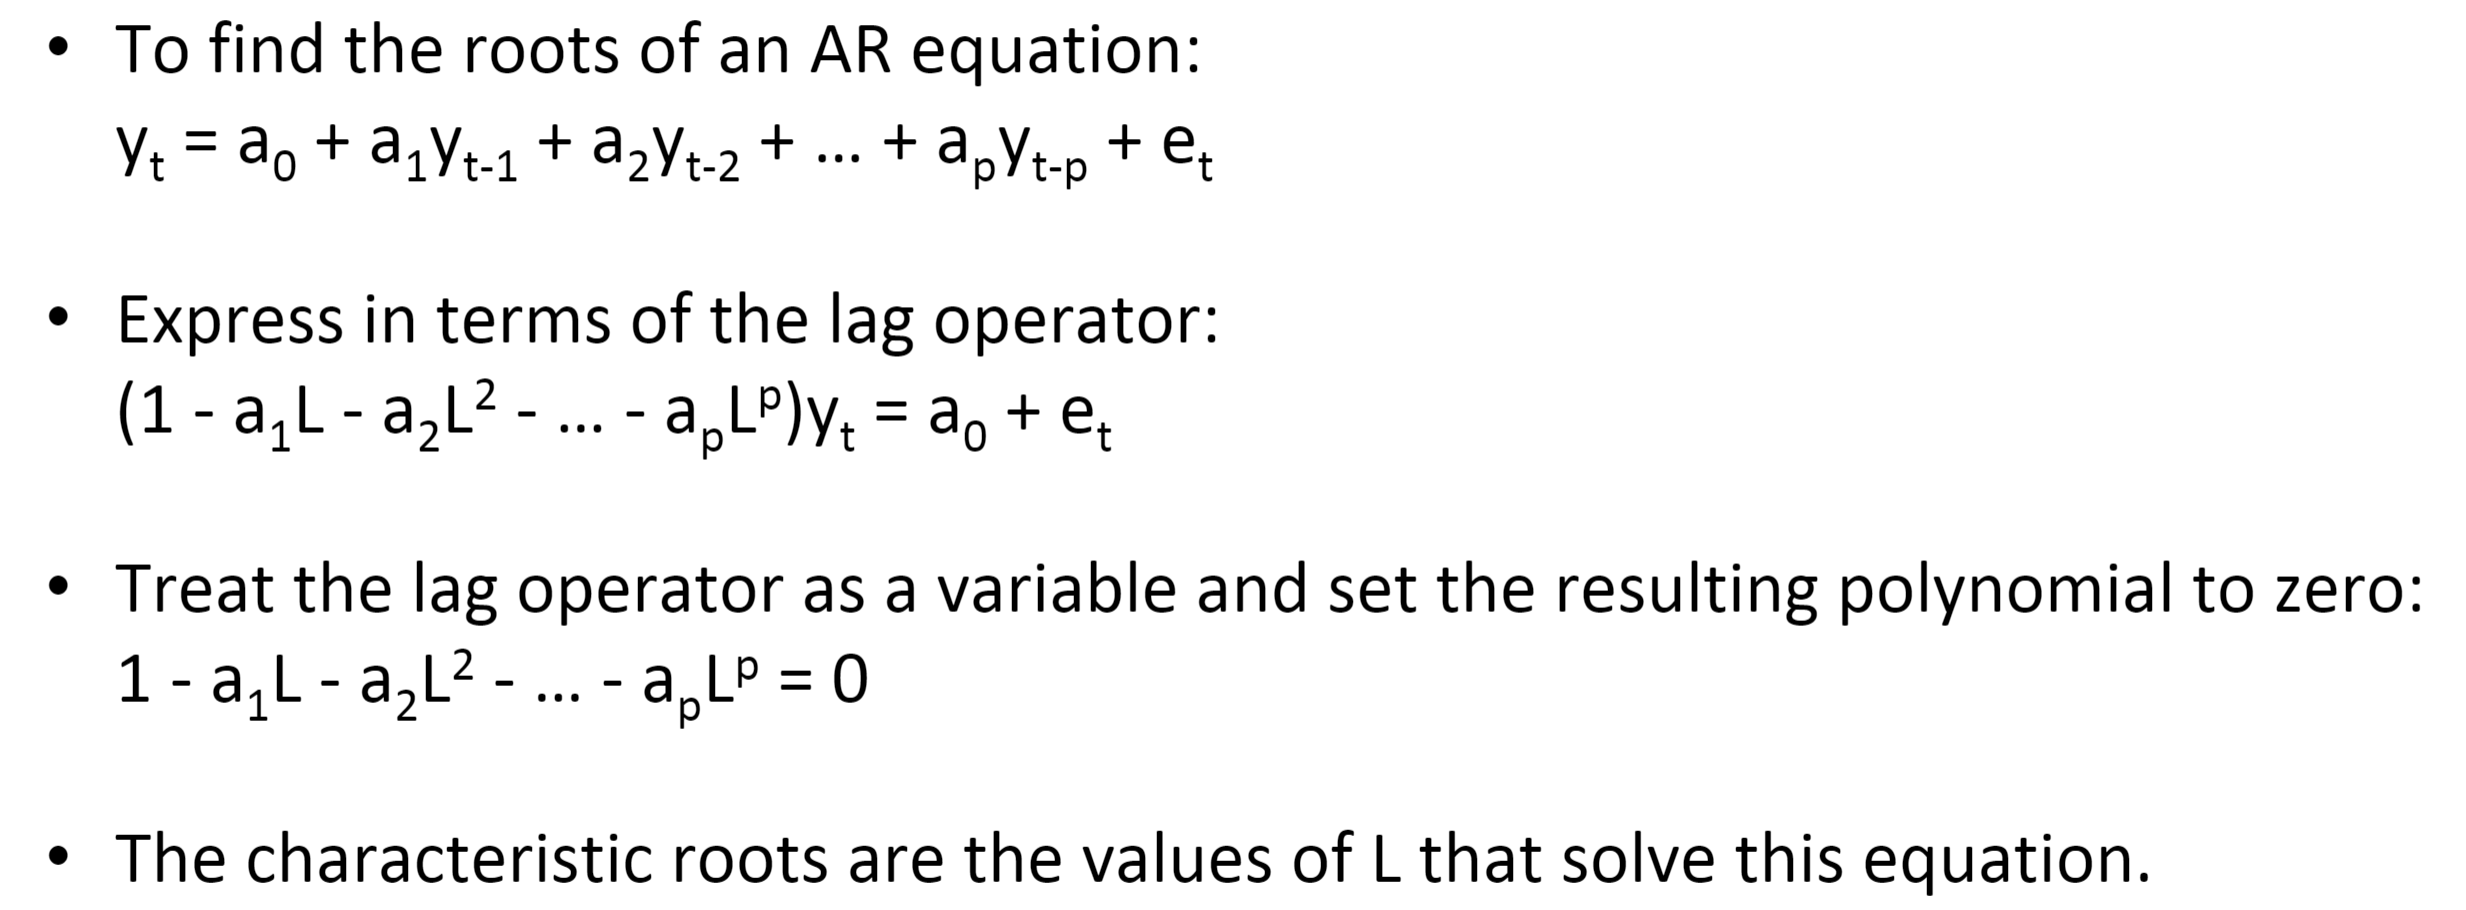

In [2]:
def isStationary(coefs):   
    return all(
        np.abs(
            np.roots(
                np.append(-1 * np.array(coefs[:0:-1]), 
                          [1]
                         )
            )
        ) > 1)

#### Convergence

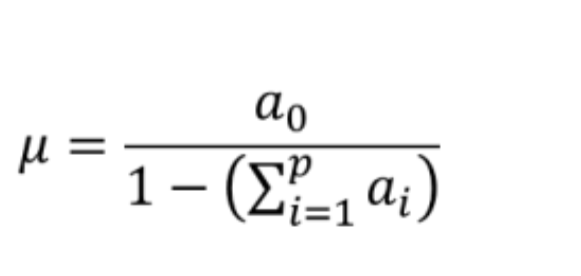

In [3]:
def convergesTo(coefs):
    if isStationary(coefs):
        return coefs[0] / (1 - sum(coefs[1:]))
    return None

In [4]:
coefs = pd.DataFrame([[0.5, -1, 0, 0], 
                      [0.5, -1, -0.5, 0], 
                      [0.5, -1, 0.5, 0], 
                      [0.5, 0, 1, 0], 
                      [0.5, 1.5, -0.8, 0], 
                      [0.5, 1.5, 0.8, 0], 
                      [0.5, -0.5, 0.5, 0.5], 
                      [0.5, -0.5, 0.5, -0.5], 
                      [0.5, -1, 0, 0.5], 
                      [0.5, 1, -1, 0.8]], 
                     columns=['a0', 'a1', 'a2', 'a3'])

#### Answer

In [5]:
ans1 = pd.concat([coefs, coefs.apply(isStationary, axis=1), coefs.apply(convergesTo, axis=1)], axis=1)
ans1 = ans1.rename(columns={0: 'Stationary?', 1: 'Converges to:'})
ans1.round(4)

,a0,a1,a2,a3,Stationary?,Converges to:
0,0.5,-1.0,0.0,0.0,False,NaN
1,0.5,-1.0,-0.5,0.0,True,0.2000
2,0.5,-1.0,0.5,0.0,False,NaN
3,0.5,0.0,1.0,0.0,False,NaN
4,0.5,1.5,-0.8,0.0,True,1.6667
5,0.5,1.5,0.8,0.0,False,NaN
6,0.5,-0.5,0.5,0.5,True,1.0000
7,0.5,-0.5,0.5,-0.5,False,NaN
8,0.5,-1.0,0.0,0.5,True,0.3333
9,0.5,1.0,-1.0,0.8,True,2.5000


### Question 2
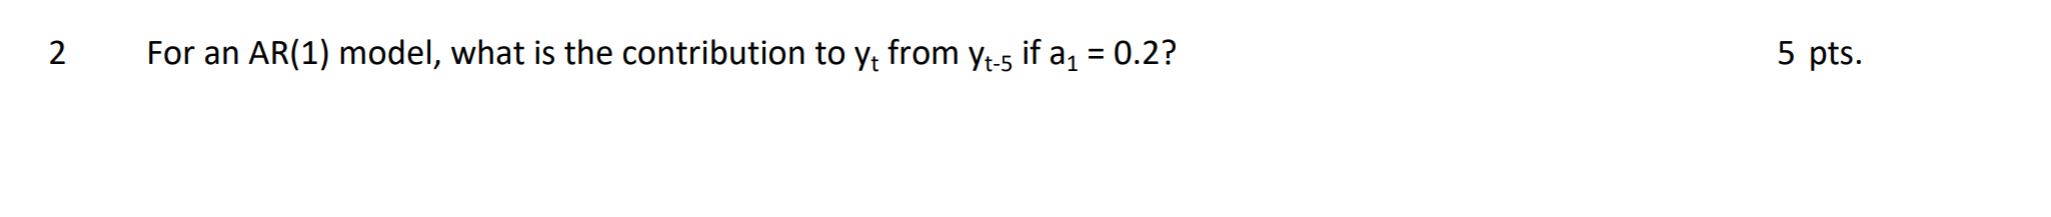

For AR(1):
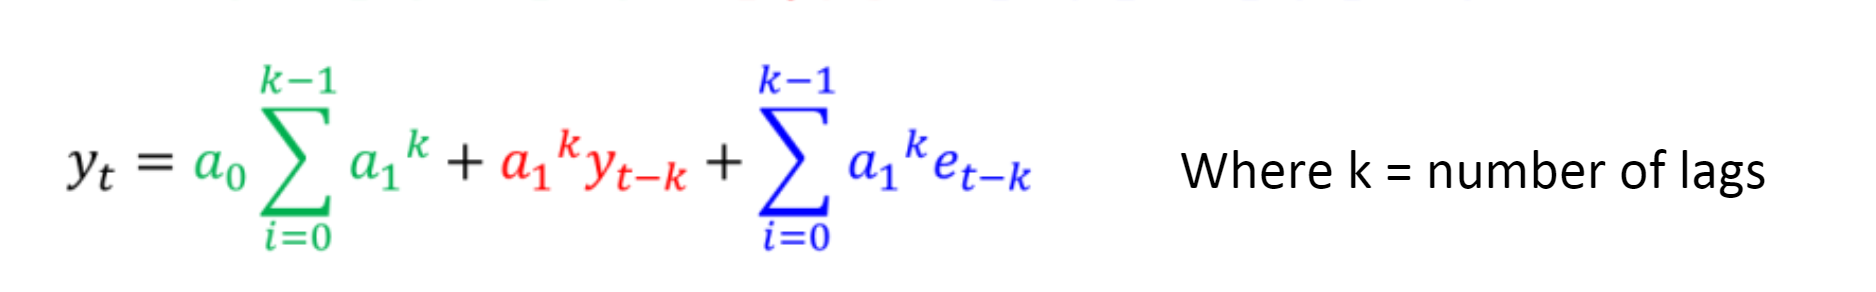

So, the contribution to $y_t$ from $y_{t-k}$ for AR(1) model will be $a_1^k$.  
  
$$y_t = 0.2^5 * y_{t-5}.$$  

In [6]:
a1 = 0.2
k = 5
display(Markdown('$y_t =' + str(round(a1 ** k, 9)) + '* y_{t-5}$.'))

$y_t =0.00032* y_{t-5}$.

### Question 3
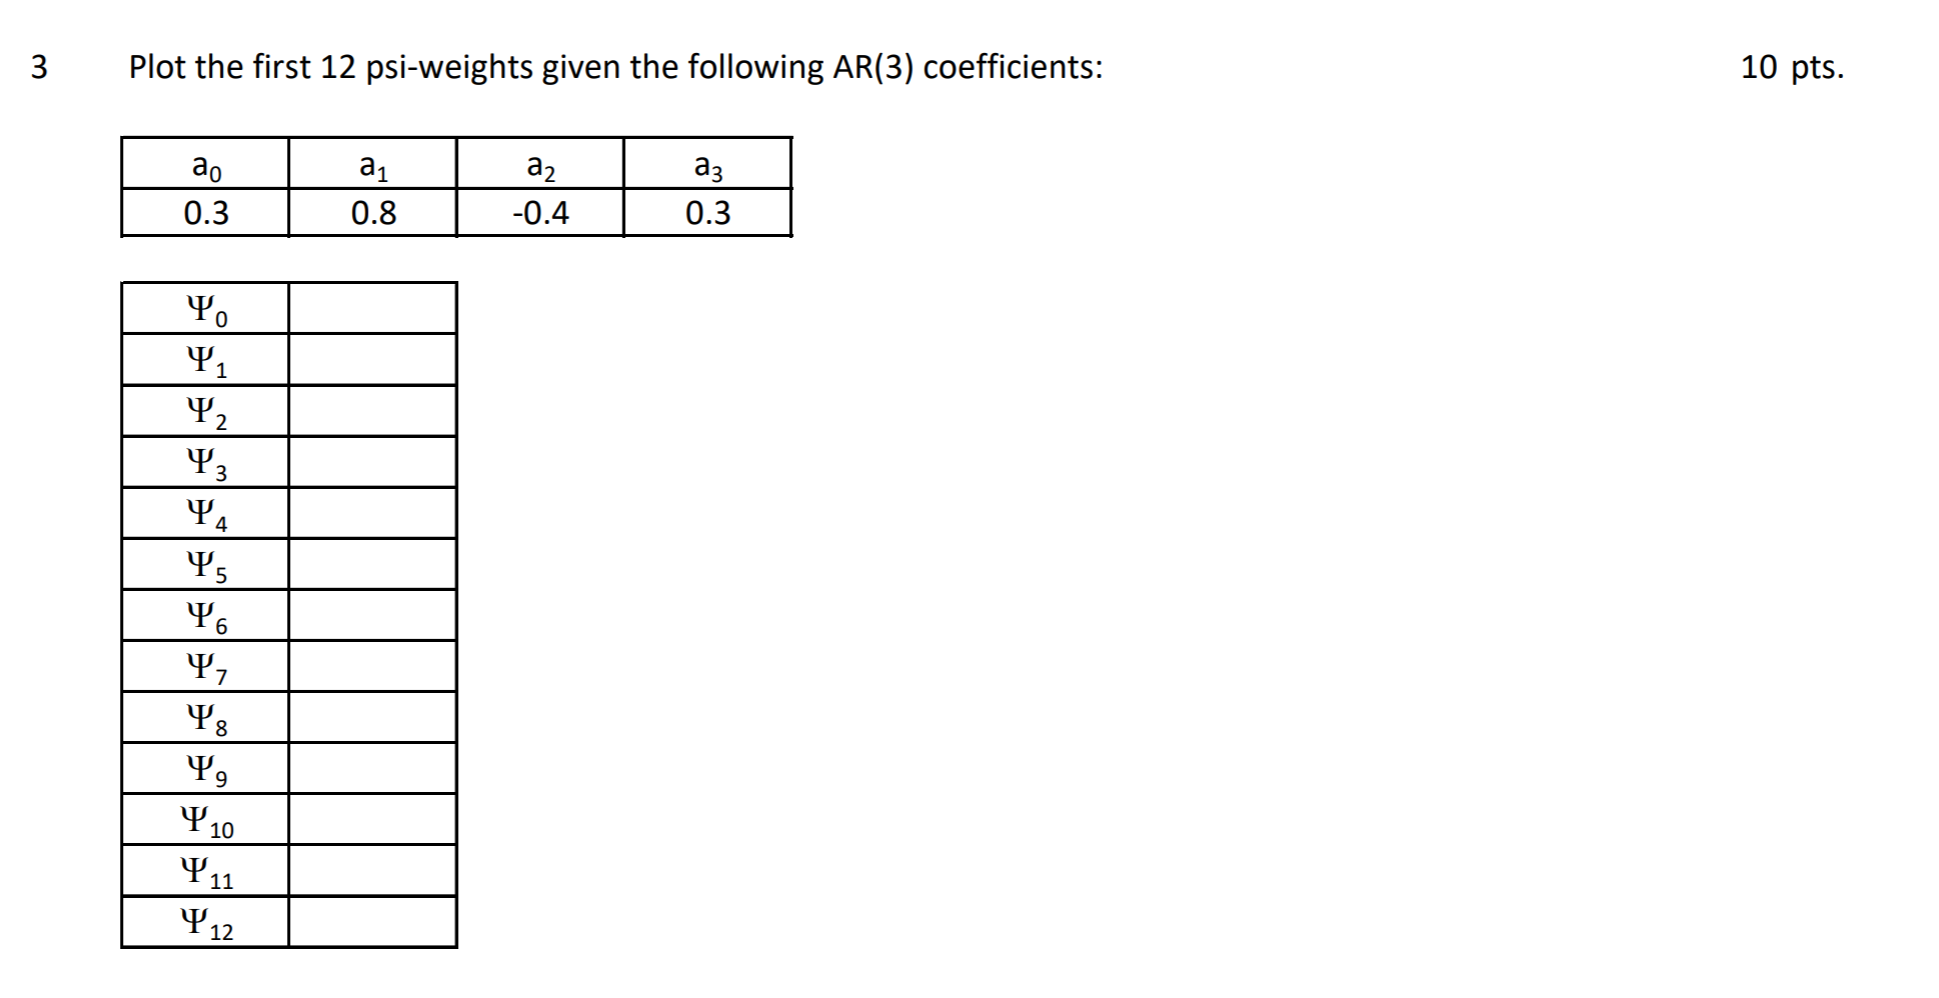

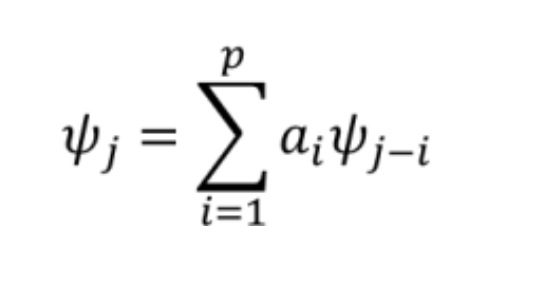  
with $\psi_j, j<0 = 0$.

In [7]:
coefs = [0.3, 0.8, -0.4, 0.3]

In [8]:
def psi(j, coefs):
    if j < 0:
        return 0
    
    if j == 0:
        return 1
    
    return sum([coefs[i] * psi(j - i, coefs) for i in range(1, len(coefs))])

In [9]:
psis = pd.DataFrame([psi(i, coefs) for i in range(13)], columns=['psi'])
psis

,psi
0,1.000000
1,0.800000
2,0.240000
3,0.172000
4,0.281600
5,0.228480
6,0.121744
7,0.090483
8,0.092233
9,0.074116


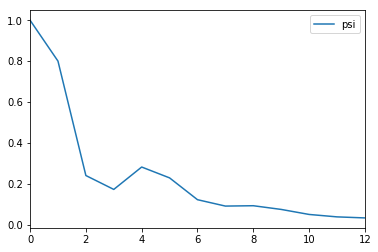

In [10]:
psis.plot()
plt.show()